## Процесс решения задачи

Решение почти любой DS задачи в продуктовой аналитике можно разбить на следующие этапы:
1) Проанализировать задачу, понять к какому виду и классу обучения она относится. Вместе с бизнесом выбрать метрику

2) EDA (exploratory data analysis) - процесс когда мы изучаем качество данных, признаки, их распределение и связь с целевой(целевыми переменными)

3) Предобработка данных (обработка пропусков, кодирование/создание новых признаков, очистка данных от выбросов и т.д.)

4) Обучение и оптимизация моделей

5) Валидация результатов

## Данные и задача

Рассмотрим все этапы выше на примере задачи предсказания оттока пользователя. 

Ссылка на данные: https://www.kaggle.com/c/customer-churn-prediction-2020/data



In [1]:
!pip freeze requiements.txt

argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
async-generator==1.10
attrs==22.2.0
backcall==0.2.0
bleach==4.1.0
cffi==1.15.1
colorama==0.4.5
dataclasses==0.8
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
importlib-metadata==4.8.3
ipykernel==5.5.6
ipython==7.16.3
ipython-genutils==0.2.0
jedi==0.17.2
Jinja2==3.0.3
jsonschema==3.2.0
jupyter-client==7.1.2
jupyter-core==4.9.2
jupyterlab-pygments==0.1.2
MarkupSafe==2.0.1
mistune==0.8.4
nbclient==0.5.9
nbconvert==6.0.7
nbformat==5.1.3
nest-asyncio==1.6.0
notebook==6.4.10
packaging==21.3
pandocfilters==1.5.1
parso==0.7.1
pickleshare==0.7.5
prometheus-client==0.17.1
prompt-toolkit==3.0.36
pycparser==2.21
Pygments==2.14.0
pyparsing==3.0.7
pyrsistent==0.18.0
python-dateutil==2.9.0.post0
pywin32==305
pywinpty==0.5.7
pyzmq==25.1.2
Send2Trash==1.8.3
six==1.16.0
terminado==0.9.5
testpath==0.6.0
tornado==6.1
traitlets==4.3.3
typing_extensions==4.1.1
wcwidth==0.2.13
webencodings==0.5.1
zipp==3.6.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv('LTV.csv')

train_data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
3774,JE84351,Oregon,6938.874476,No,Extended,Bachelor,1/4/11,Employed,M,53133,...,6,0,9,Personal Auto,Personal L3,Offer2,Agent,652.386798,Two-Door Car,Small
614,LN26837,California,2592.437797,Yes,Basic,High School or Below,1/2/11,Employed,M,72421,...,23,0,1,Personal Auto,Personal L2,Offer2,Call Center,312.000000,Four-Door Car,Small
6259,YK36937,Washington,5791.012841,No,Basic,College,1/8/11,Employed,M,33799,...,47,1,3,Personal Auto,Personal L3,Offer3,Agent,355.200000,Four-Door Car,Medsize
6010,LJ59940,Nevada,16468.220790,Yes,Basic,High School or Below,1/27/11,Unemployed,F,0,...,52,0,2,Corporate Auto,Corporate L3,Offer2,Agent,685.126940,Four-Door Car,Medsize
869,ST96866,Washington,3123.080994,Yes,Basic,Bachelor,2/19/11,Unemployed,M,0,...,83,4,1,Special Auto,Special L3,Offer1,Agent,960.115399,SUV,Large
7152,ES82658,Oregon,6418.248710,No,Extended,Master,1/3/11,Employed,M,46648,...,26,0,7,Personal Auto,Personal L3,Offer4,Web,123.576765,Four-Door Car,Medsize
4858,VS73599,Arizona,7019.177186,Yes,Basic,College,1/23/11,Retired,M,26806,...,19,0,2,Personal Auto,Personal L2,Offer1,Agent,302.400000,Four-Door Car,Medsize
6589,FW16824,Oregon,4758.192310,No,Basic,High School or Below,1/22/11,Employed,M,72805,...,34,4,3,Corporate Auto,Corporate L3,Offer2,Branch,365.466805,Four-Door Car,Medsize
8050,EV57176,California,5605.380417,No,Basic,High School or Below,1/21/11,Employed,F,21171,...,40,0,3,Corporate Auto,Corporate L3,Offer4,Call Center,345.600000,Four-Door Car,Large
2198,DO83038,California,8355.774443,No,Basic,College,1/21/11,Employed,F,64502,...,49,0,2,Personal Auto,Personal L3,Offer2,Call Center,39.336222,Two-Door Car,Medsize


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [37]:
X = train_data.drop('Customer Lifetime Value', axis = 1)
y = train_data['Customer Lifetime Value']

## Выделим численные признаки от остальных

In [9]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [10]:
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [11]:
train_data[num_cols].describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Построим графики, посмотрим на распределение признаков

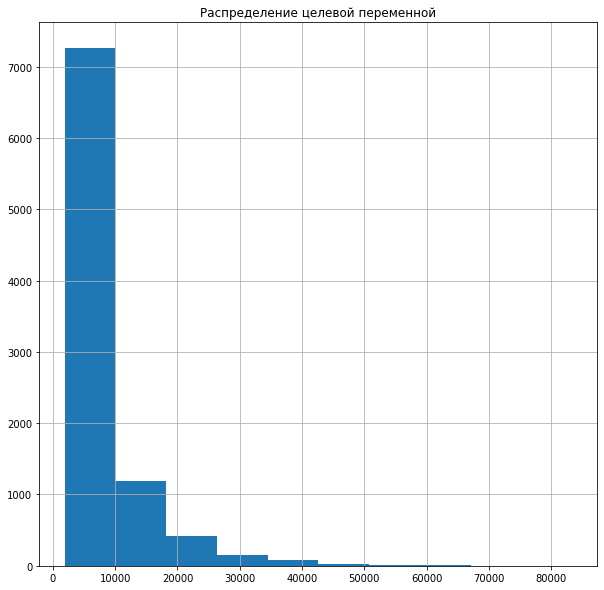

In [12]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Customer Lifetime Value'].hist()

plt.show()

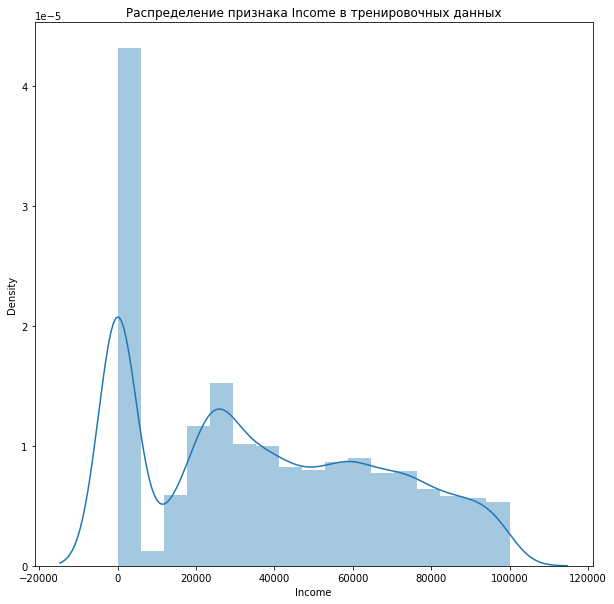

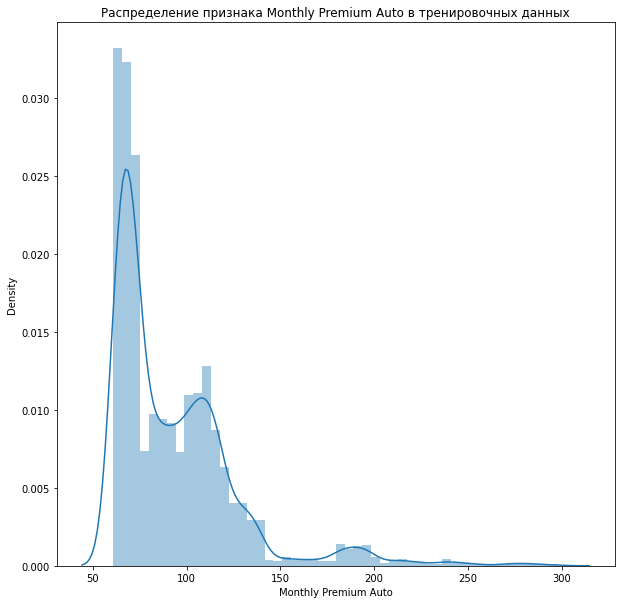

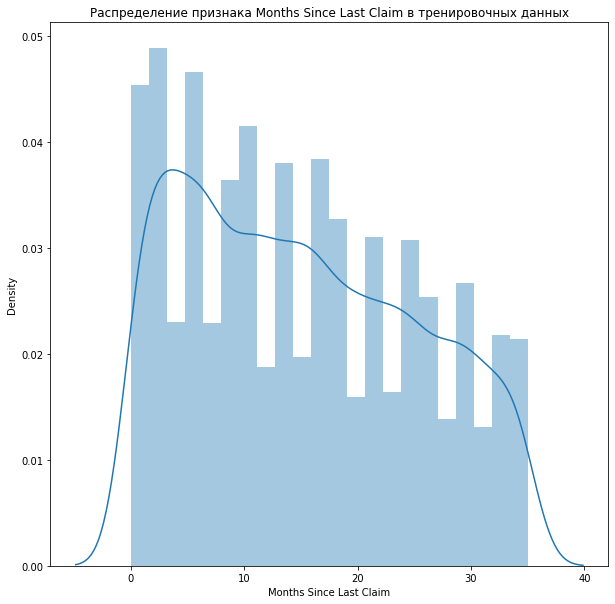

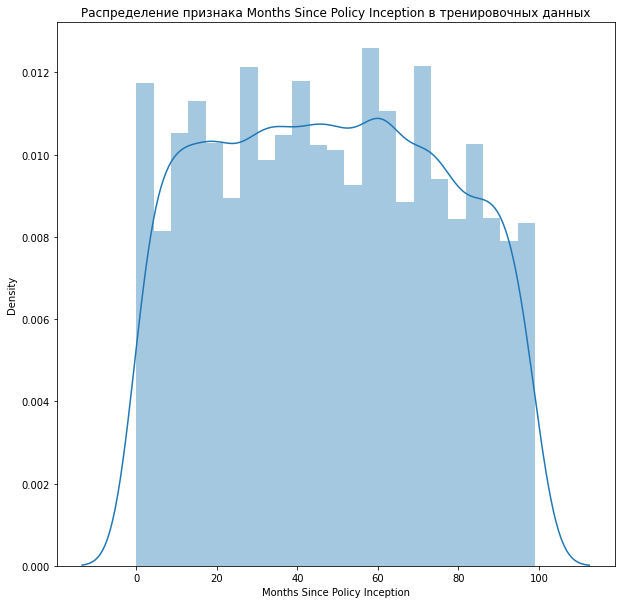

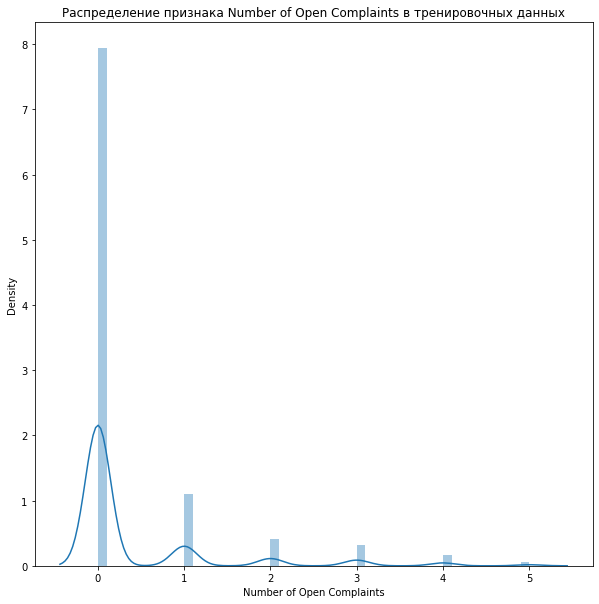

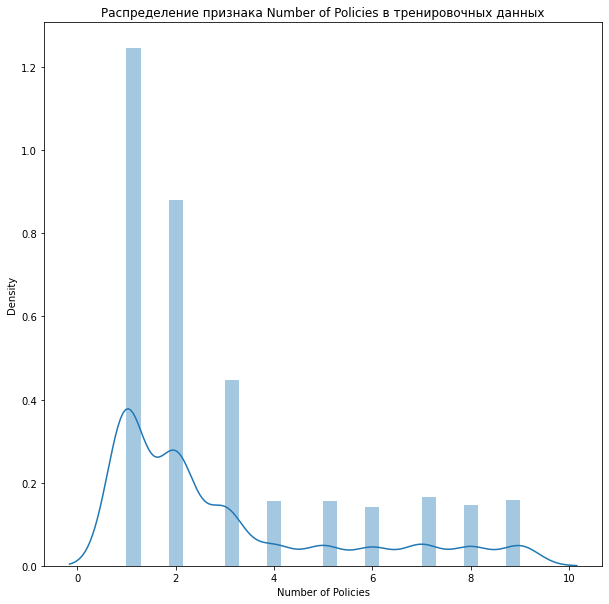

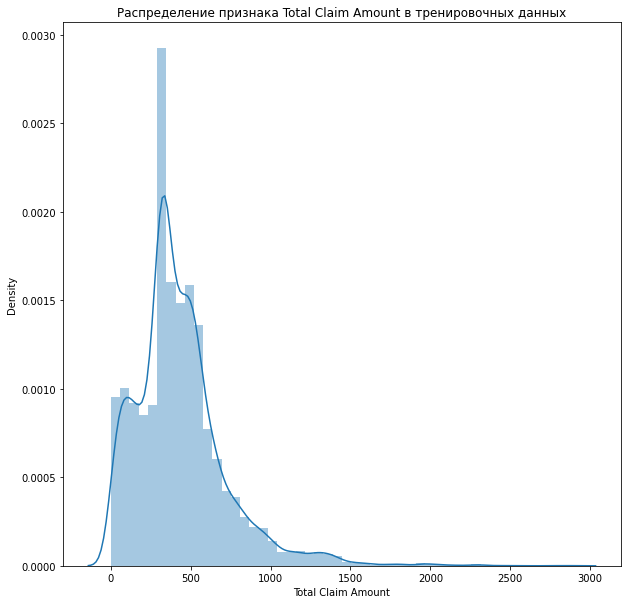

In [13]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

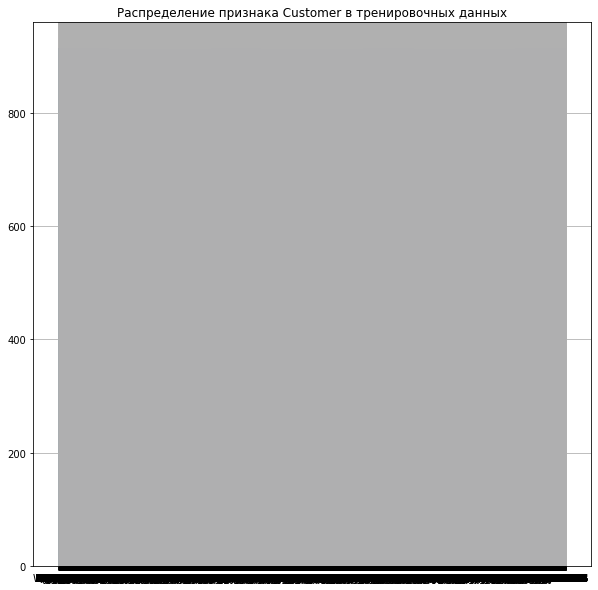

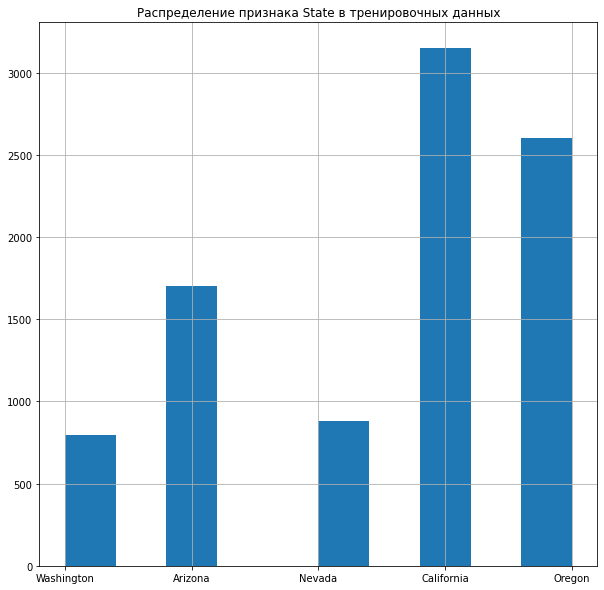

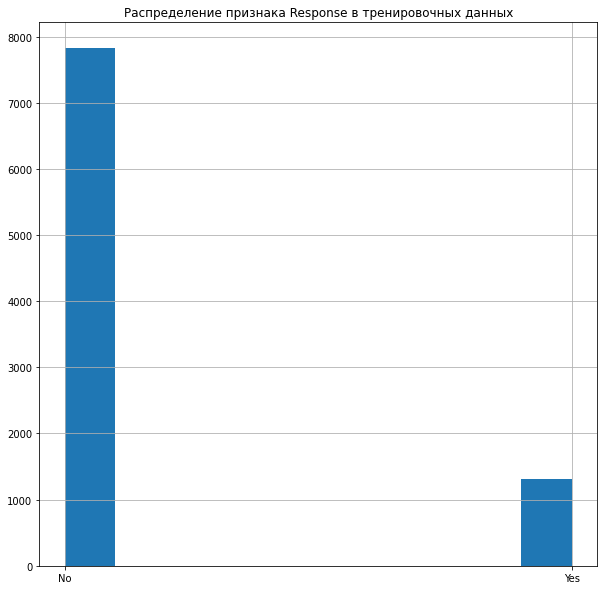

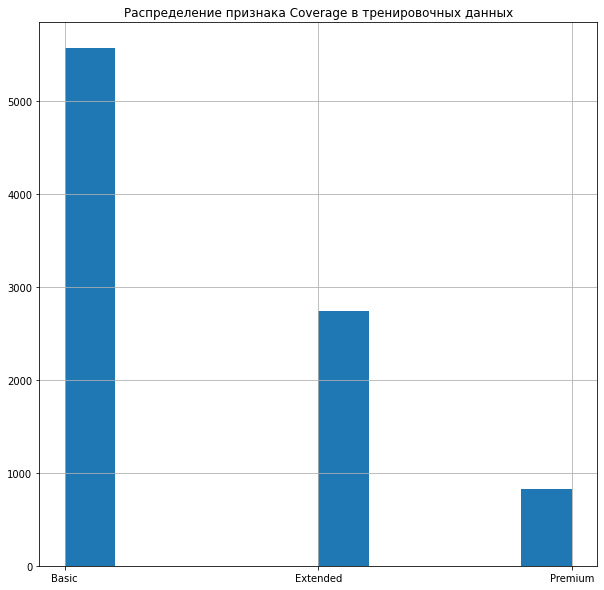

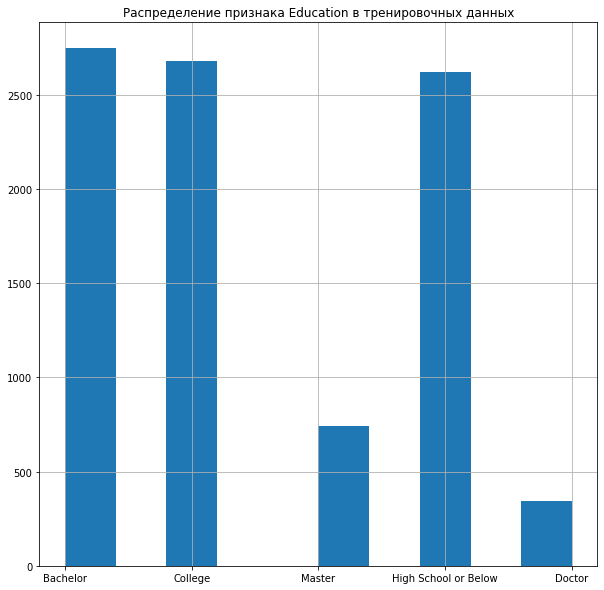

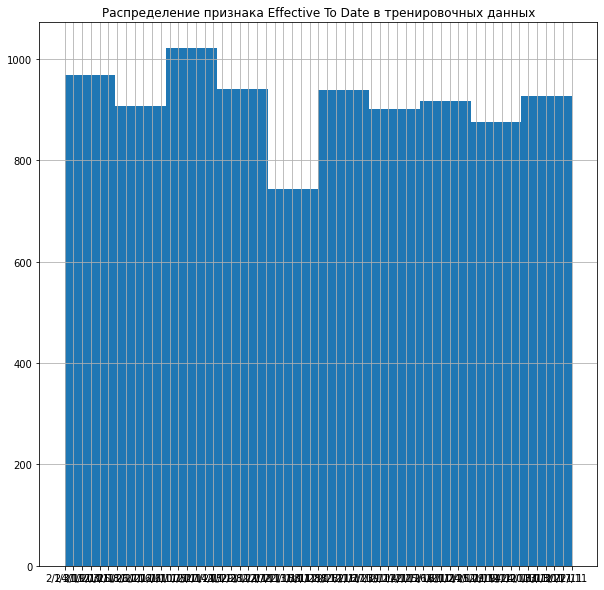

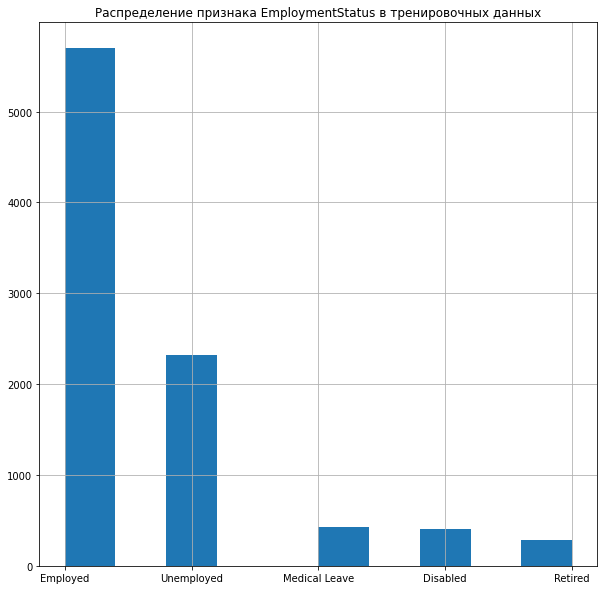

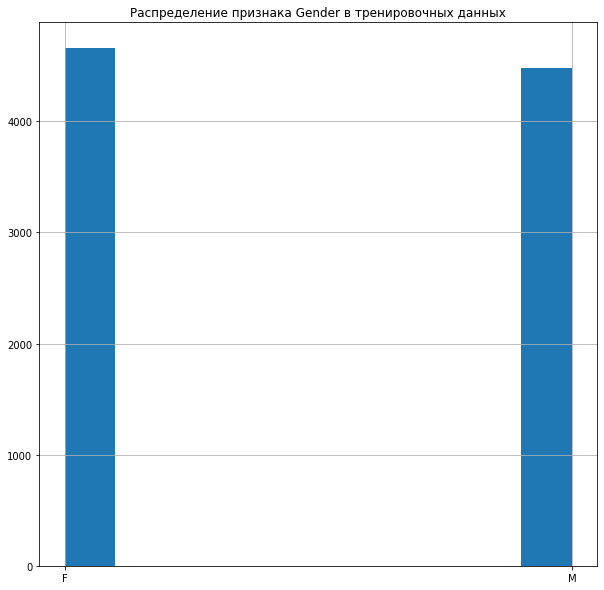

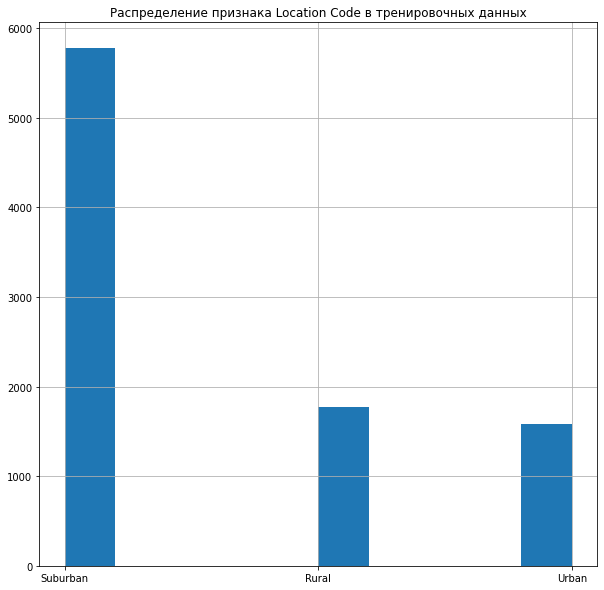

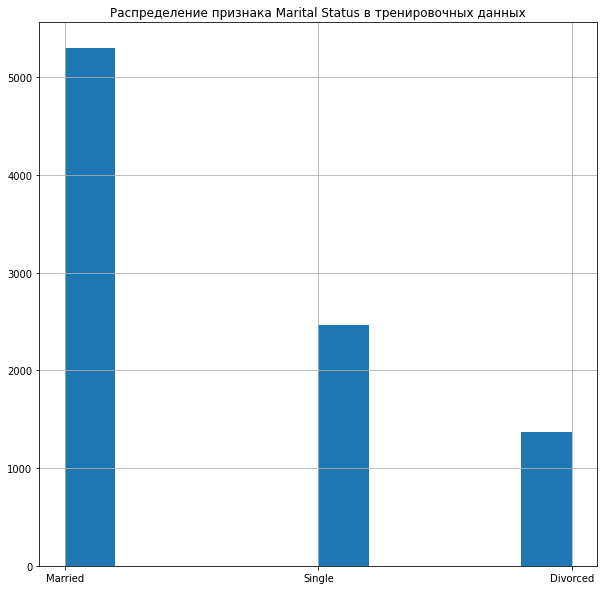

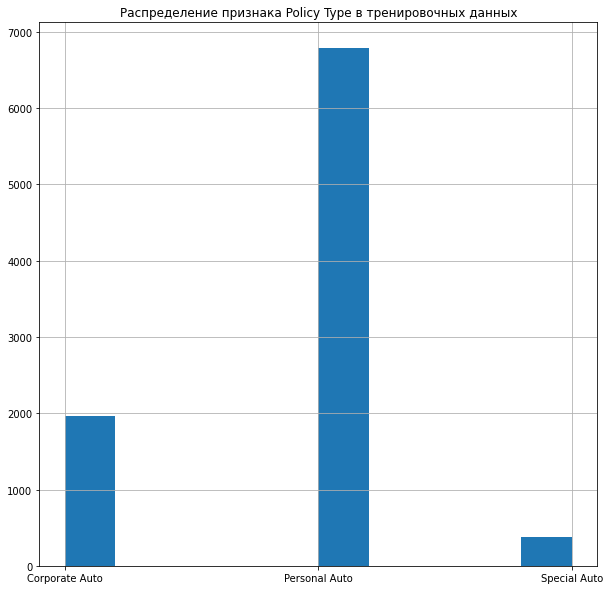

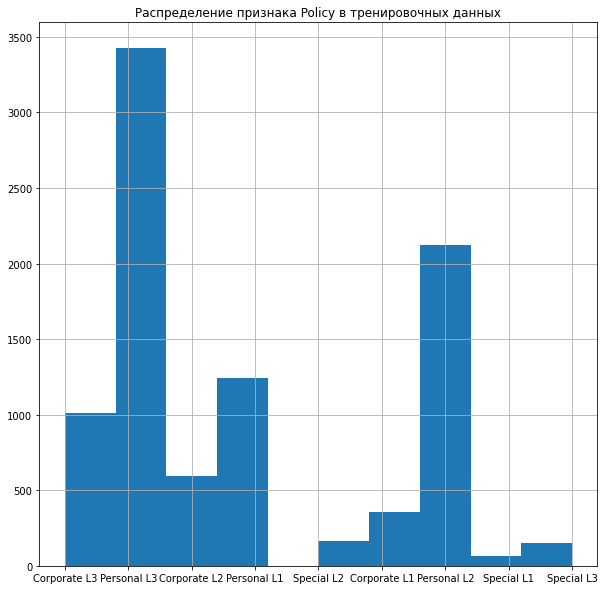

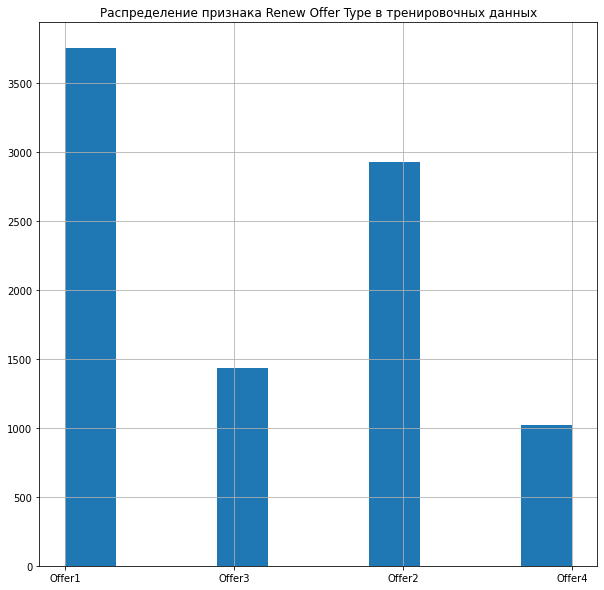

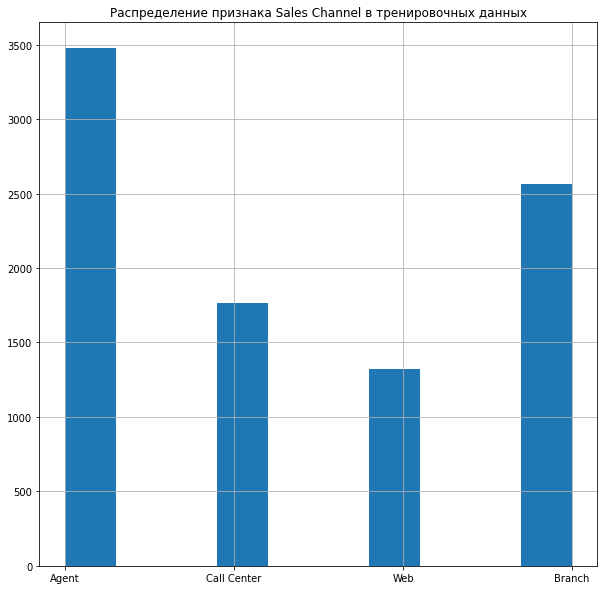

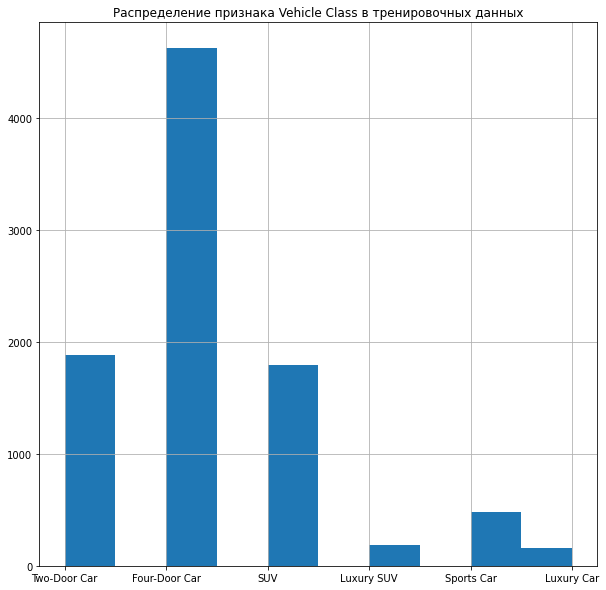

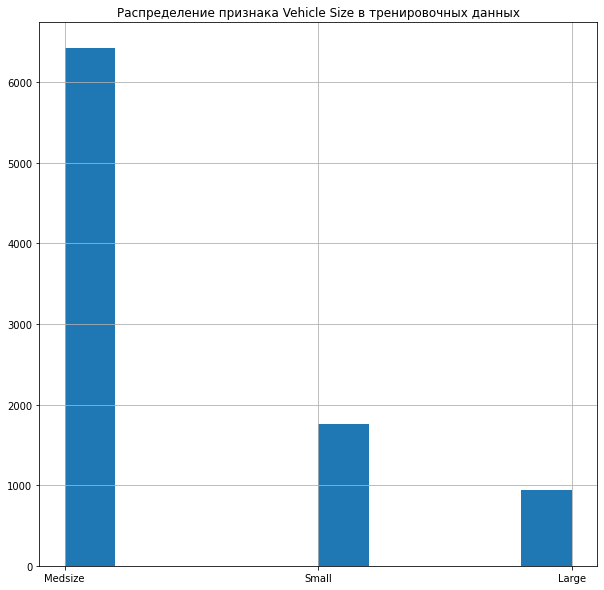

In [14]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

## Сравнение мужчин и женщин

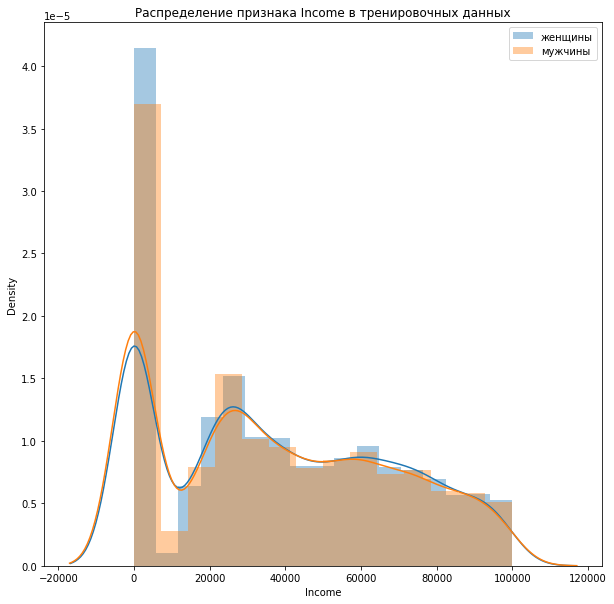

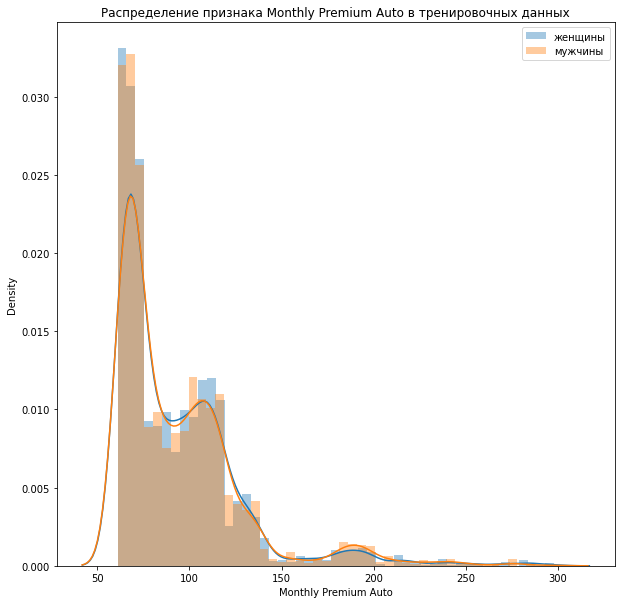

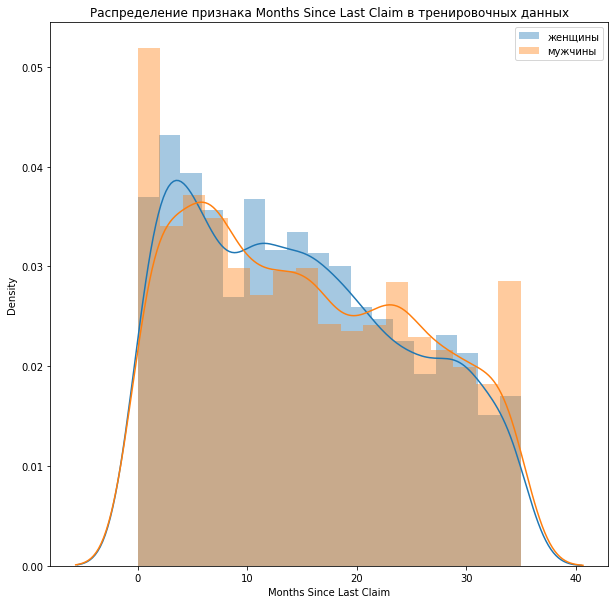

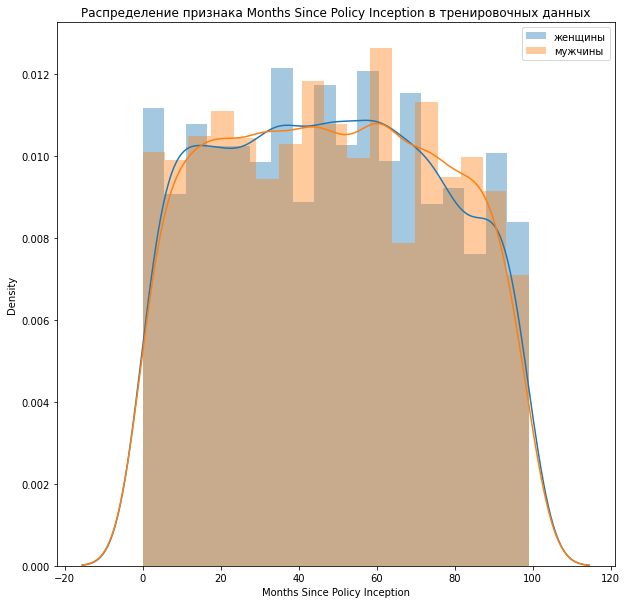

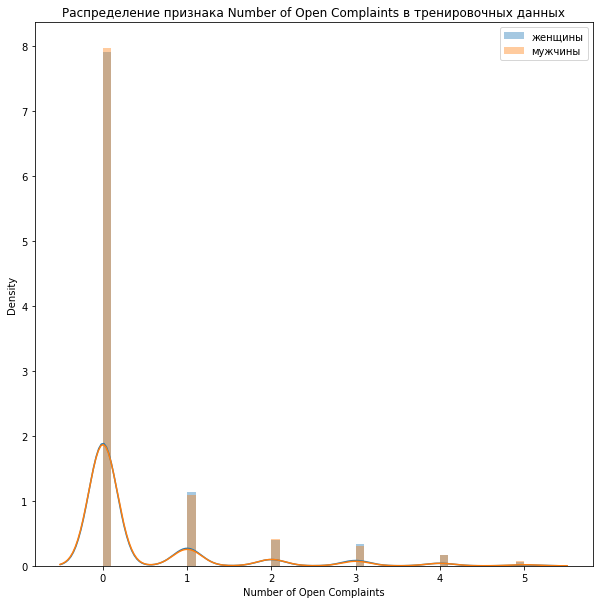

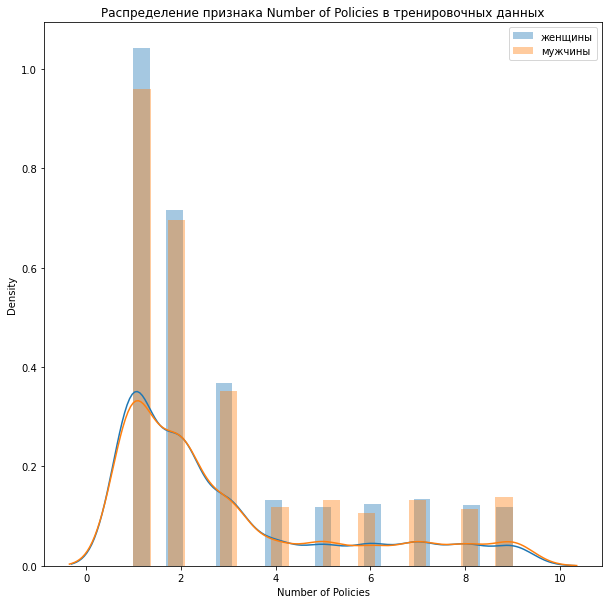

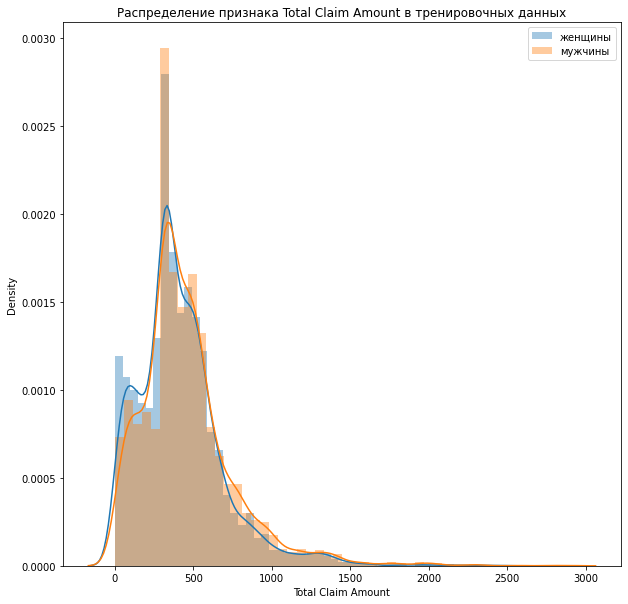

In [16]:
femaly = train_data[train_data['Gender'] == 'F']
man = train_data[train_data['Gender'] == 'M']


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(femaly[col], label = 'женщины')
    sns.distplot(man[col], label = 'мужчины')   
    plt.legend()

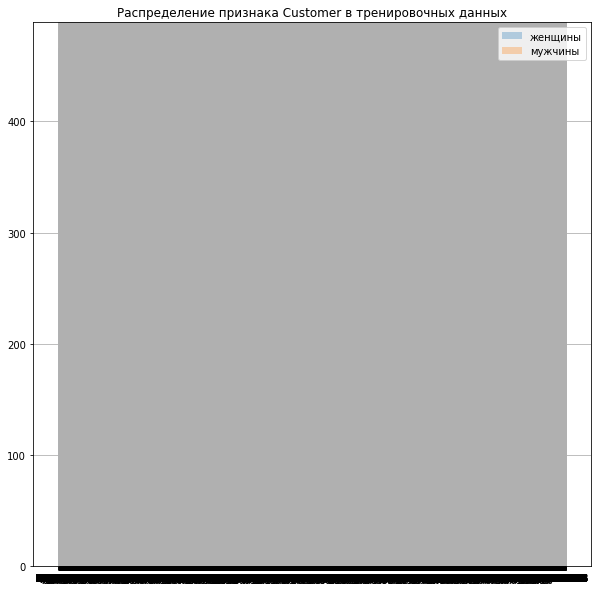

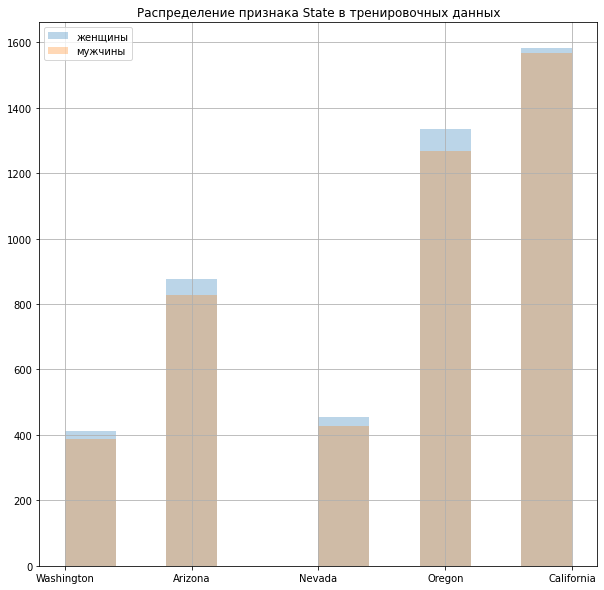

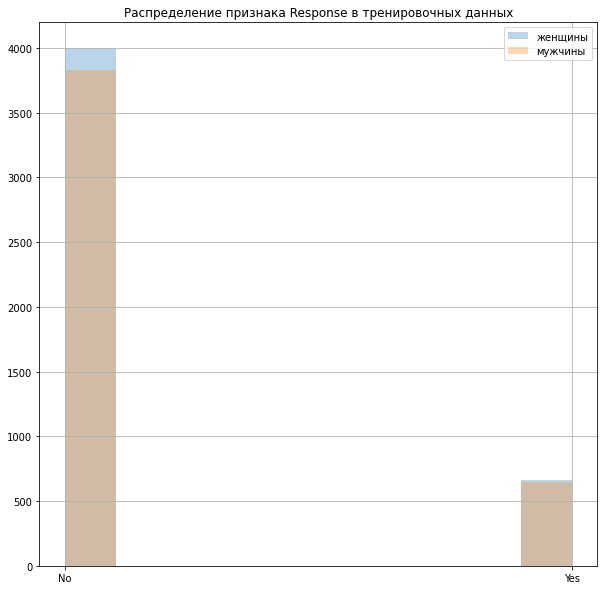

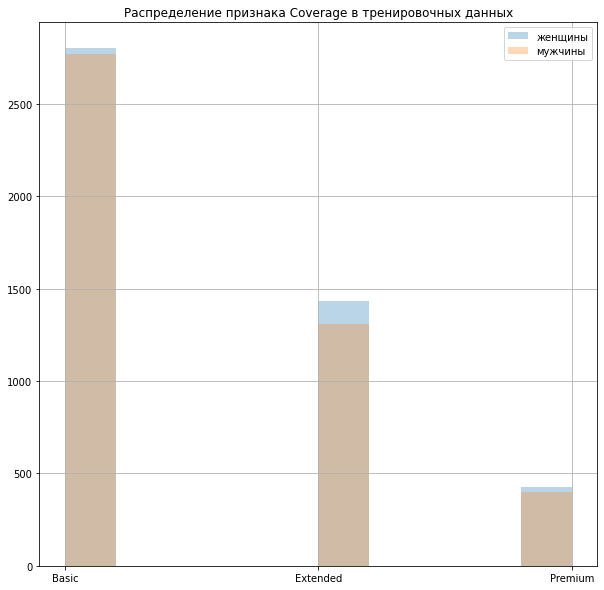

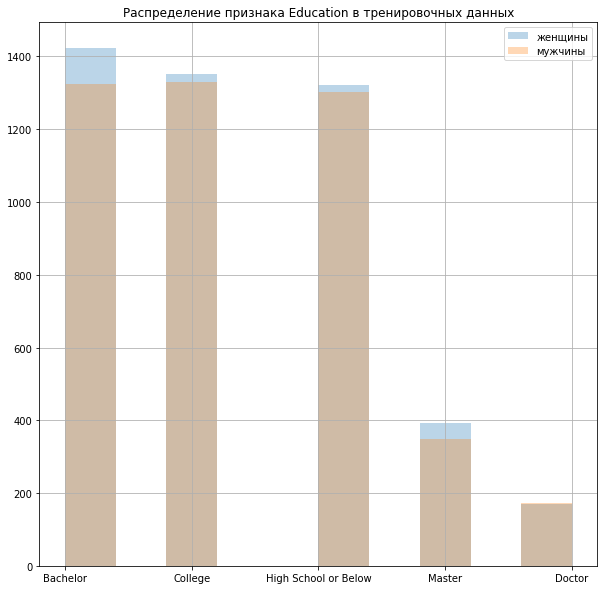

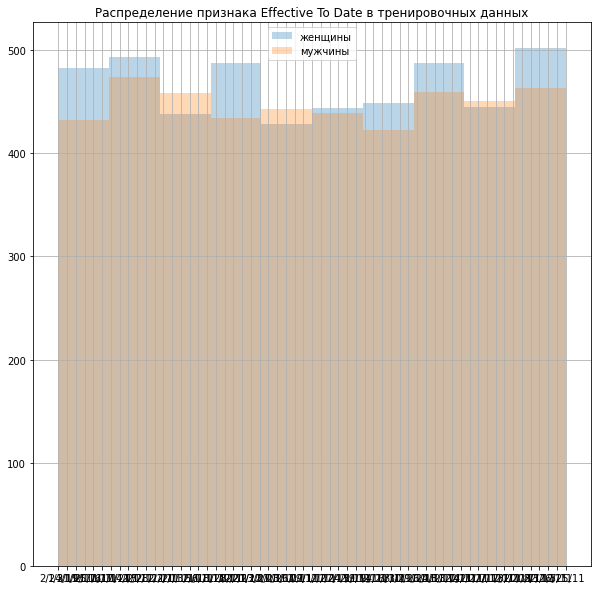

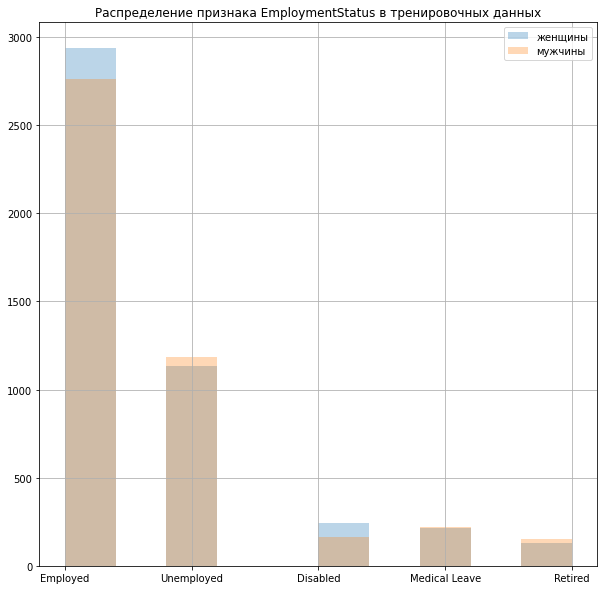

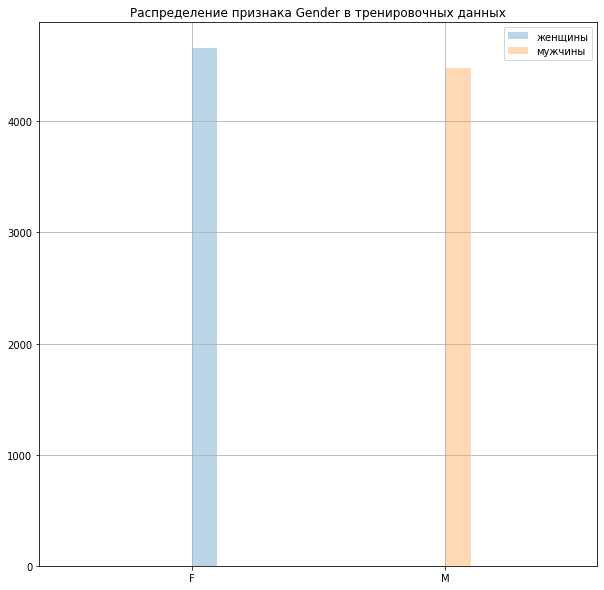

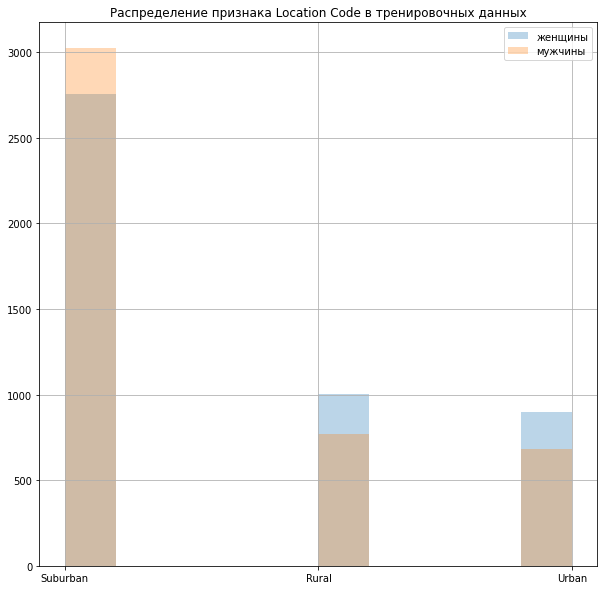

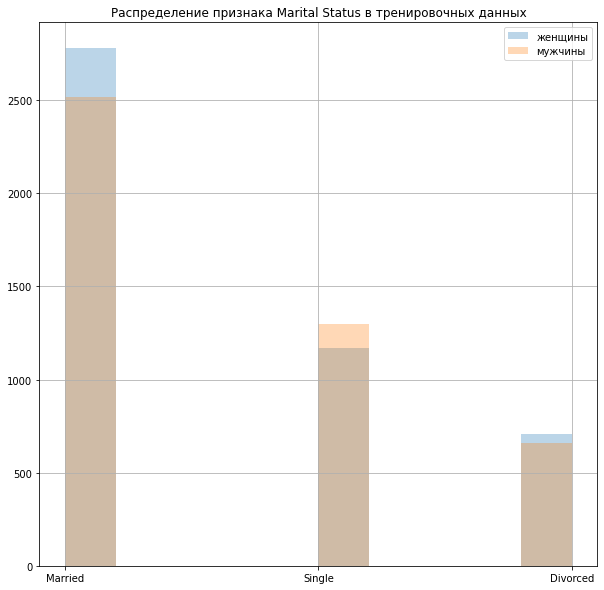

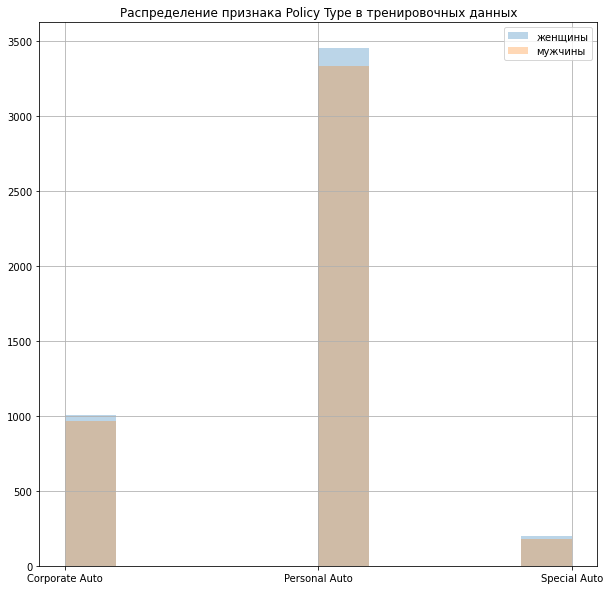

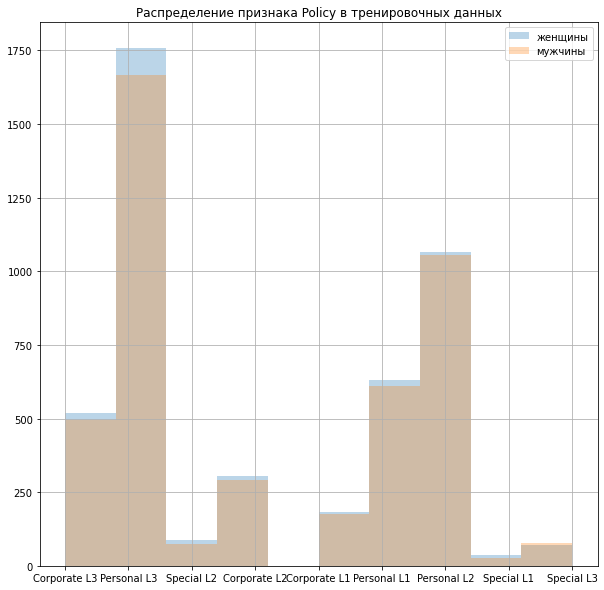

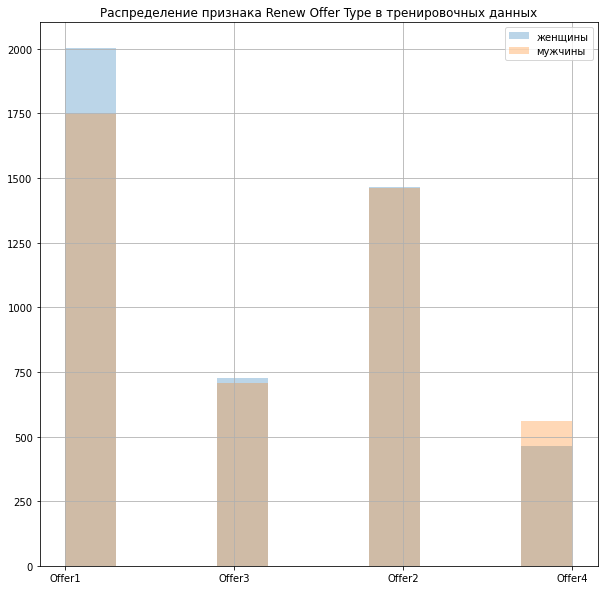

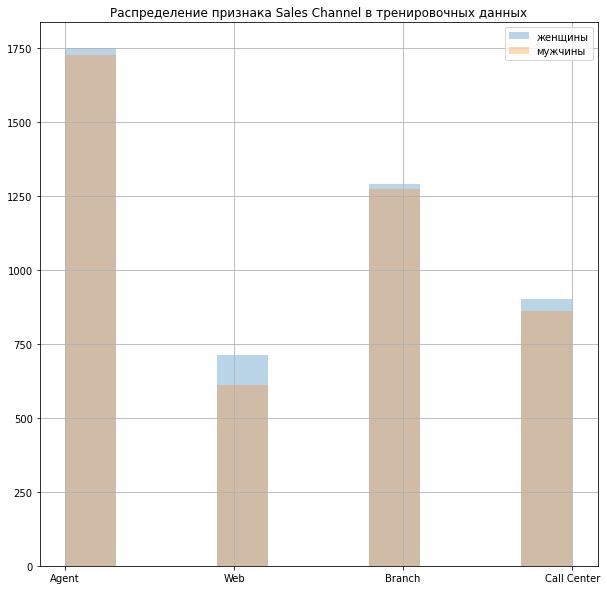

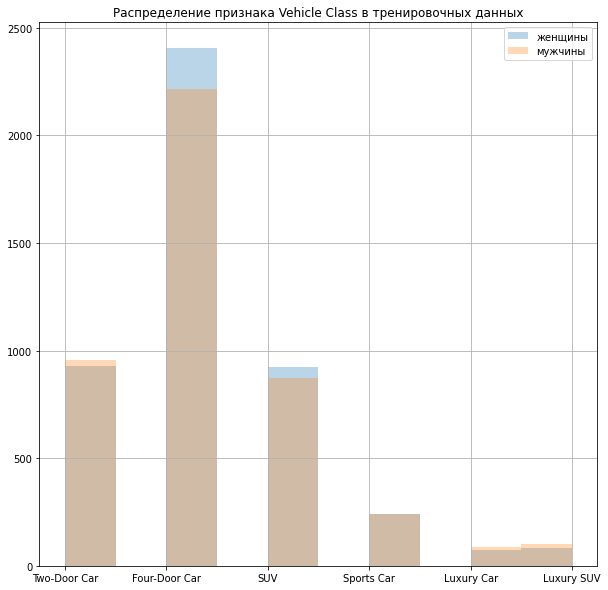

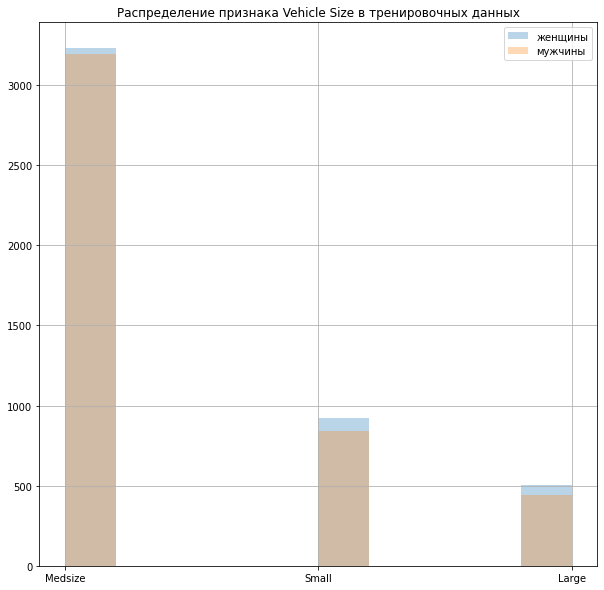

In [17]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    femaly[col].hist(label = 'женщины', alpha=0.3)
    man[col].hist(label = 'мужчины', alpha = 0.3)   
    plt.legend()

## Предобработка признаков

**Важно** Любое изменение признаков нужно делать и на тренировочной и на тестовой выборке

In [38]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(X, columns=['Gender', 'Response'])

str_cols = []
cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] not in ('int64', 'float64'):
        str_cols.append(col)

le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])        

X.sample(10)

,Customer,State,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,Marital Status,Monthly Premium Auto,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Gender_F,Gender_M,Response_No,Response_Yes
4267,6795,4,0,0,3,1,30969,1,0,63,...,5,0,2,358.225234,5,2,0,1,1,0
7825,5117,0,0,3,19,1,44279,1,1,61,...,3,1,0,292.800000,5,2,0,1,1,0
916,3250,3,0,1,42,1,66943,0,1,65,...,7,2,2,53.084753,0,1,1,0,1,0
4701,9126,3,1,3,24,4,0,1,2,97,...,4,0,3,669.399277,0,1,1,0,1,0
3746,6200,0,0,0,48,0,18375,1,1,103,...,3,0,1,535.080276,4,0,0,1,0,1
5157,4226,0,2,1,8,1,95715,0,1,119,...,5,0,0,148.982550,0,1,0,1,1,0
5183,7493,3,0,0,45,4,0,1,2,117,...,3,2,3,842.400000,4,1,0,1,1,0
1674,6742,1,0,1,0,4,0,1,1,64,...,2,2,0,380.822087,0,1,1,0,1,0
9011,4612,1,0,1,30,4,0,1,2,71,...,4,2,0,511.750971,0,1,1,0,1,0
7113,3369,4,0,3,4,1,53055,1,2,112,...,3,2,2,537.600000,3,2,1,0,1,0


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2)

print(X_test.shape)

(1827, 25)


In [40]:
# Решающее дерево
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_dec_tree = cross_validate(dec_tree, X_train, y_train, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))

NameError: name 'cross_validate' is not defined

In [17]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier


ran_for = RandomForestClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_ran_for = cross_validate(ran_for, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))

Результаты решающего дерева: 0.9214617474990672


Как видно, лучший результат показал случайный лес

## Интерпретация модели и важность признаков

Для того чтобы понять что заставляет пользователей уходить и оставаться, нужно понять влияние признаков. При работе с логистической регрессией можно использовать атрибут `coef_`

**Важно** атрибут `coef_` работает только когда метод `fit()` был явно вызван

In [18]:
log_reg.fit(X, y)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)

Коэффициенты в линейной регрессии: [[-1.01960720e-03 -7.49896336e-04  1.88458477e-02  2.48287601e+00
  -1.47583983e+00  1.70677795e-02  1.52430691e-02 -4.49669808e-03
  -1.69099063e-02  2.33979369e-03 -9.51631600e-03  5.66828733e-03
   2.14472026e-03 -7.91028770e-03 -6.42512933e-03  3.02425814e-02
  -1.83998706e-01  4.61683744e-03  5.19037991e-01]]


При работе с одним решающем дереве интерпретировать результаты достаточно просто, для этого есть атрибут `feature_importances_` Он показывает долю важности признака на целевую переменную

**Важно** атрибут `feature_importances_` работает только когда метод `fit()` был явно вызван

In [19]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.01029229 0.01539475 0.00632471 0.06271318 0.00145955 0.07490983
 0.2421433  0.01972551 0.03539672 0.07148688 0.02155188 0.05592603
 0.03678969 0.01572565 0.03679544 0.08708072 0.07061281 0.03139983
 0.10427124]


Некоторые типы моделей (например экстримально случайный лес и все что основано на бустинге) интерпретировать стандартными способами практически невозможно. 

Для интерпретации таких моделей можно использовать библиотеку `shap`, которая работает на основе ядра и вектора Шэпли - важнейших понятий в коалиционной теории игр

In [20]:
# Раскомментируйте чтобы установить 
#!pip install shap

In [21]:
import shap
# Загружаем JS шаблоны для визуализации
shap.initjs()

# Обязателен явный вызов метода fit
ran_for.fit(X, y)

print("Обучили модель, переходим к визуализации")
# Интерпретируем предсказания модели при помощи SHAP
explainer = shap.TreeExplainer(ran_for)
shap_values = explainer.shap_values(X)

Обучили модель, переходим к визуализации


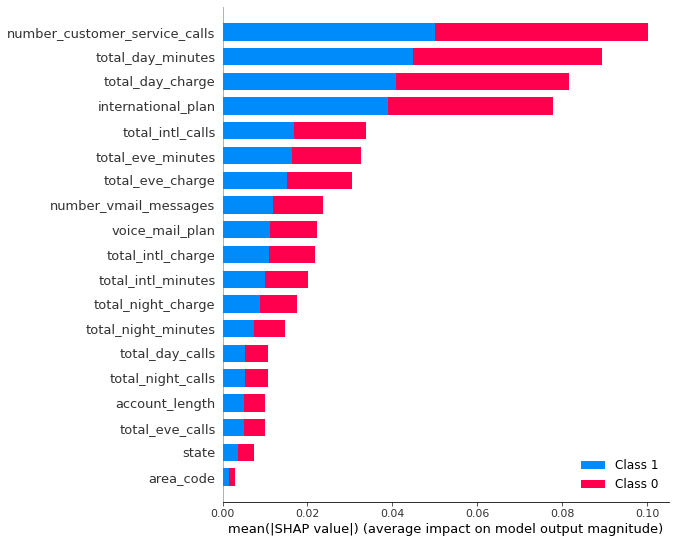

In [22]:
# Общий график
shap.summary_plot(shap_values, X, plot_type="bar")